C:\Jupyter\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


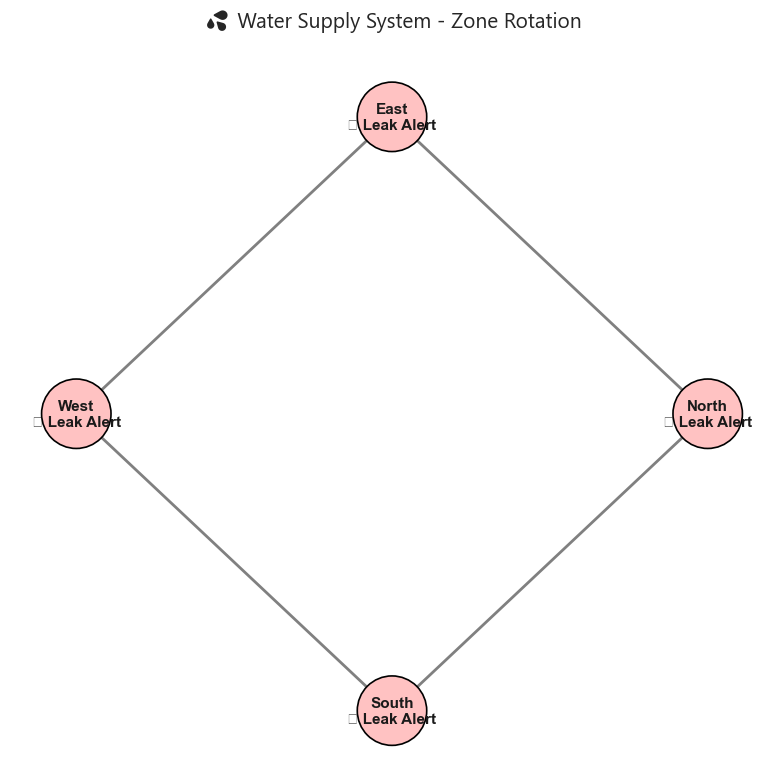

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from langgraph.graph import StateGraph
from langchain_core.runnables import RunnableLambda
from typing import TypedDict, Literal, List
import random

# Fix for emoji support
plt.rcParams['font.family'] = 'Segoe UI Emoji'

# ---------------------------
# Step 1: Define the state
# ---------------------------

class ZoneState(TypedDict):
    zone: str
    status: Literal["Supply On", "Pending", "Maintenance", "Leak Alert"]
    time: int

STATES = ["Supply On", "Pending", "Maintenance", "Leak Alert"]
STATE_ICONS = {
    "Supply On": "💧",
    "Pending": "⌛",
    "Maintenance": "🛠️",
    "Leak Alert": "🚨"
}
STATE_COLORS = {
    "Supply On": "#ccf2ff",      # Light Aqua
    "Pending": "#fff4cc",        # Light Yellow
    "Maintenance": "#ffdfcc",    # Light Orange
    "Leak Alert": "#ffc2c2"      # Light Red
}

# ---------------------------
# Step 2: Transition Logic
# ---------------------------

def transition(state: ZoneState) -> ZoneState:
    if state["status"] == "Supply On" and random.random() < 0.1:
        next_status = "Leak Alert"
    else:
        idx = STATES.index(state["status"])
        next_status = STATES[(idx + 1) % len(STATES)]
    return {
        "zone": state["zone"],
        "status": next_status,
        "time": state["time"] + 1
    }

# ---------------------------
# Step 3: Build LangGraph
# ---------------------------

graph = StateGraph(ZoneState)
graph.add_node("zone_shift", RunnableLambda(transition))
graph.set_entry_point("zone_shift")
graph.set_finish_point("zone_shift")
app = graph.compile()

# ---------------------------
# Step 4: Simulate State Flow
# ---------------------------

zones = ["North", "East", "West", "South"]
history: List[ZoneState] = []

for t in range(6):  # 6 time intervals
    for zone in zones:
        last = next((h for h in reversed(history) if h["zone"] == zone), None)
        init_state = {"zone": zone, "status": "Supply On", "time": 0} if not last else last
        if init_state["status"] != "Leak Alert":
            updated = app.invoke(init_state)
            history.append(updated)

# ---------------------------
# Step 5: Visualize (Circular Graph)
# ---------------------------

G = nx.DiGraph()
positions = {}
zone_labels = {}
zone_colors = []

for i, zone in enumerate(zones):
    latest = next(h for h in reversed(history) if h["zone"] == zone)
    icon = STATE_ICONS[latest['status']]
    label = f"{zone}\n{icon} {latest['status']}"
    G.add_node(zone, label=label)
    zone_labels[zone] = label
    zone_colors.append(STATE_COLORS[latest["status"]])

# Position nodes in a circular layout
angle_step = 360 / len(zones)
for i, zone in enumerate(zones):
    angle = i * angle_step
    x = np.cos(np.radians(angle))
    y = np.sin(np.radians(angle))
    positions[zone] = (x, y)

# Create edges to form a loop
for i in range(len(zones)):
    G.add_edge(zones[i], zones[(i + 1) % len(zones)])

# Plot the graph
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos=positions, node_color=zone_colors, node_size=2500, edgecolors='black', linewidths=1.2)
nx.draw_networkx_edges(G, pos=positions, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)
nx.draw_networkx_labels(G, pos=positions, labels=zone_labels, font_size=11, font_weight='bold')

plt.title("💦 Water Supply System - Zone Rotation", fontsize=15, pad=20)
plt.axis("off")
plt.tight_layout()
plt.show()

In [35]:
class ZoneState(TypedDict):
    zone: str
    status: Literal["Supply On", "Pending", "Maintenance", "Leak Alert"]
    time: int

STATES = ["Supply On", "Pending", "Maintenance", "Leak Alert"]
STATE_ICONS = {
    "Supply On": "💧",
    "Pending": "⌛",
    "Maintenance": "🛠️",
    "Leak Alert": "🚨"
}
STATE_COLORS = {
    "Supply On": "#ccf2ff",      # Light Aqua
    "Pending": "#fff4cc",        # Light Yellow
    "Maintenance": "#ffdfcc",    # Light Orange
    "Leak Alert": "#ffc2c2"      # Light Red
}

In [37]:
# Step 2: Transition Logic

def transition(state: ZoneState) -> ZoneState:
    if state["status"] == "Supply On" and random.random() < 0.1:
        next_status = "Leak Alert"
    else:
        idx = STATES.index(state["status"])
        next_status = STATES[(idx + 1) % len(STATES)]
    return {
        "zone": state["zone"],
        "status": next_status,
        "time": state["time"] + 1
    }


In [39]:
# Step 3: Build LangGraph
# ---------------------------

graph = StateGraph(ZoneState)
graph.add_node("zone_shift", RunnableLambda(transition))
graph.set_entry_point("zone_shift")
graph.set_finish_point("zone_shift")
app = graph.compile()

In [41]:
# Step 4: Simulate State Flow
# ---------------------------

zones = ["North", "East", "West", "South"]
history: List[ZoneState] = []

for t in range(6):  # 6 time intervals
    for zone in zones:
        last = next((h for h in reversed(history) if h["zone"] == zone), None)
        init_state = {"zone": zone, "status": "Supply On", "time": 0} if not last else last
        if init_state["status"] != "Leak Alert":
            updated = app.invoke(init_state)
            history.append(updated)

In [43]:
# Step 5: Visualize (Circular Graph)
# ---------------------------

G = nx.DiGraph()
positions = {}
zone_labels = {}
zone_colors = []

for i, zone in enumerate(zones):
    latest = next(h for h in reversed(history) if h["zone"] == zone)
    icon = STATE_ICONS[latest['status']]
    label = f"{zone}\n{icon} {latest['status']}"
    G.add_node(zone, label=label)
    zone_labels[zone] = label
    zone_colors.append(STATE_COLORS[latest["status"]])

{'North': Text(1.0, 0.0, 'North\n🚨 Leak Alert'),
 'East': Text(6.123233995736766e-17, 1.0, 'East\n🚨 Leak Alert'),
 'West': Text(-1.0, 1.2246467991473532e-16, 'West\n🚨 Leak Alert'),
 'South': Text(-1.8369701987210297e-16, -1.0, 'South\n🚨 Leak Alert')}

C:\Jupyter\New folder\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  func(*args, **kwargs)
C:\Jupyter\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


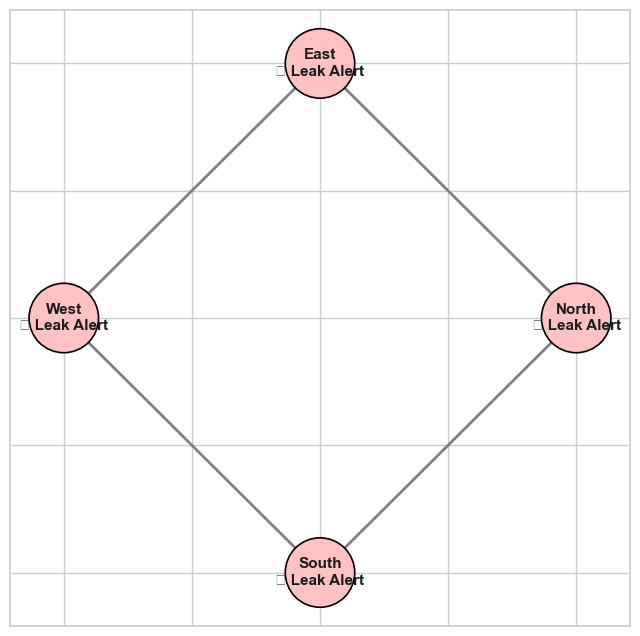

In [45]:
# Position nodes in a circular layout
angle_step = 360 / len(zones)
for i, zone in enumerate(zones):
    angle = i * angle_step
    x = np.cos(np.radians(angle))
    y = np.sin(np.radians(angle))
    positions[zone] = (x, y)

# Create edges to form a loop
for i in range(len(zones)):
    G.add_edge(zones[i], zones[(i + 1) % len(zones)])

# Plot the graph
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos=positions, node_color=zone_colors, node_size=2500, edgecolors='black', linewidths=1.2)
nx.draw_networkx_edges(G, pos=positions, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)
nx.draw_networkx_labels(G, pos=positions, labels=zone_labels, font_size=11, font_weight='bold')

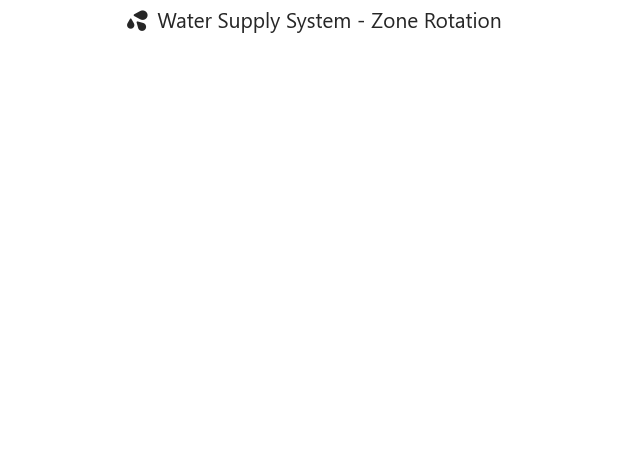

In [47]:

plt.title("💦 Water Supply System - Zone Rotation", fontsize=15, pad=20)
plt.axis("off")
plt.tight_layout()
plt.show()